<h3>Setting everything up</h3>

In [1]:
#import the file from the web
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unicodedata import normalize
import re
from datetime import datetime
from pandas import read_csv 

# I can give a number or use None to remove maximum ceiling & display all columns
pd.options.display.max_columns = None

# # I want to be able to see the entire narrative, so remove the maximum width for each column
pd.options.display.max_colwidth = None

pd.options.display.float_format = '${:,.2f}'.format


In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 8)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# My commonly used R imports

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [5]:
#To Download PDFs
from urllib.parse import urljoin


In [6]:
#To import camelot and PDF-related items
import camelot
import ghostscript
import sys

In [7]:
#To read images

# !install.packages("jpeg")  ## if necessary

In [8]:
%%R

library(jpeg)


<h3> In this section, I test whether it is possible to get the table I desire (cost of food) so that I figure out if it is worth scraping for the CPI PDF downloads. If I can scrape within the PDF, then it is worth making a scraper to download the PDFs.</h3>

In [9]:


tables = camelot.read_pdf('/Users/ivynyayieka/Downloads/January-2023-CPI-.pdf', flavor='stream', pages='all')
tables
# # <TableList n=1>
n=3
tables.export('january2023.csv', f='csv', compress=True) # json, excel, html, markdown, sqlite
# tables[1]
# # <Table shape=(14, 3)>
tables[n].parsing_report
{
    'accuracy': 99.02,
    'whitespace': 12.24,
    'order': 1,
    'page': 1
}
tables[n].to_csv('january2023.csv') # to_json, to_excel, to_html, to_markdown, to_sqlite
tables[n].df # get a pandas DataFrame!


,0,1,2,3,4,5,6,7,8
0,,,,Average,,last month,,,% Change over
1,,,Average,Price,Average,,January 2023/,last year,
2,,Unit of,Price January,December,Price January,December,,,January 2023/
3,Commodity Name,Quantity\nMeasure,2022,2022,2023,2022,,January 2022,
4,Mangoes,1 Kilogramme,109.58,121.58,115.83,,(4.7),,5.7
5,Potatoes (Irish),1 Kilogramme,76.16,94.57,91.02,,(3.8),,19.5
6,Cowpeas,1 Kilogramme,93.95,136.36,131.41,,(3.6),,39.9
7,Onion -Leeks and Bulbs,1 Kilogramme,127.94,121.70,118.90,,(2.3),,(7.1)
8,Maize Grain - Loose,1 Kilogramme,56.73,77.47,76.42,,(1.4),,34.7
9,Kale-Sukuma Wiki,1 Kilogramme,59.36,61.05,60.25,,(1.3),,1.5


<h3>Now that I have extracted the desired table, worth figuring out how to get a list of links of the PDFs containing CPI details. Once I get this link, I can figure out how to go to each link, download the PDF and run dear Camelot so that I get my desired table for each</h3>

In [10]:
knbs_url = "https://www.knbs.or.ke/data-releases/"
knbs_raw_html = requests.get(knbs_url).content
knbs_soup_doc = BeautifulSoup(knbs_raw_html, "html.parser")
# print(soup_doc.prettify())

In [11]:
# list = ['admin', 'add', 'swear']
# st = 'siteadmin'
# if any([x in st for x in list]):print "found"
# else: print "not found"
    
cpi_links=[]    
non_cpis=['leading' , 'lei','highlights','quarter','construction','produc','guide','gdp','trade','bop','trends','histor','changes-in-average']
download_links=knbs_soup_doc.find_all(class_="wpdm-download-link download-on-click btn btn-primary")

for download_link in download_links:
    if 'leading' not in download_link['data-downloadurl']:
#         print(download_link['data-downloadurl'])
        if 'lei' not in download_link['data-downloadurl']:
            if 'highlights' not in download_link['data-downloadurl']:
                if 'quarter' not in download_link['data-downloadurl']:
                    if 'construction' not in download_link['data-downloadurl']:
                        if 'produc' not in download_link['data-downloadurl']:
                            if 'guide' not in download_link['data-downloadurl']:
                                if 'gdp' not in download_link['data-downloadurl']:
                                    if 'trade' not in download_link['data-downloadurl']:
                                        if 'bop' not in download_link['data-downloadurl']:
                                            if 'trends' not in download_link['data-downloadurl']:
                                                if 'histor' not in download_link['data-downloadurl']:
                                                    if 'changes-in-average' not in download_link['data-downloadurl']:
                                                        cpi_links.append(download_link['data-downloadurl'])



<h3>Now I have a list of links with cpis. Next I need to go into each link and download PDFs. If they can go into different folders or be named differently, that would be great</h3>

<h3>First making a list of potential titles for the downloaded pdfs which will inform csv naming of tables</h3>

In [12]:
df_links = pd.DataFrame (cpi_links, columns = ['cpi_link'])
df_links

,cpi_link
0,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-january-2023/?wpdmdl=6898&refresh=63f26bc5b58c31676831685
1,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-december-2022/?wpdmdl=6870&refresh=63f26bc607e7e1676831686
2,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-november-2022/?wpdmdl=6845&refresh=63f26bc6305f61676831686
3,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-october-2022/?wpdmdl=6791&refresh=63f26bc6660c71676831686
4,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-september-2022/?wpdmdl=6764&refresh=63f26bc6736d51676831686
...,...
216,https://www.knbs.or.ke/download/june-2004/?wpdmdl=3774&refresh=63f26bd347c3b1676831699
217,https://www.knbs.or.ke/download/april-2004/?wpdmdl=3773&refresh=63f26bd3561e61676831699
218,https://www.knbs.or.ke/download/march-2004/?wpdmdl=3772&refresh=63f26bd36457d1676831699
219,https://www.knbs.or.ke/download/january-2004/?wpdmdl=3771&refresh=63f26bd372a9a1676831699


In [13]:
# for cpi_link in cpi_links:
#     cpi_title=cpi_link.extract("-(\d+3)[/?]")
#     print(cpi_title)

    
df_links['cpi_title']=df_links.cpi_link.str.extract("-?/?(\w+-\d+)[/?]")
# df_links=df_links.cpi_title.dropna()
df_links.cpi_title.dropna()

df_links = df_links[df_links['cpi_title'].notna()]


df_links

,cpi_link,cpi_title
0,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-january-2023/?wpdmdl=6898&refresh=63f26bc5b58c31676831685,january-2023
1,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-december-2022/?wpdmdl=6870&refresh=63f26bc607e7e1676831686,december-2022
2,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-november-2022/?wpdmdl=6845&refresh=63f26bc6305f61676831686,november-2022
3,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-october-2022/?wpdmdl=6791&refresh=63f26bc6660c71676831686,october-2022
4,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-september-2022/?wpdmdl=6764&refresh=63f26bc6736d51676831686,september-2022
...,...,...
216,https://www.knbs.or.ke/download/june-2004/?wpdmdl=3774&refresh=63f26bd347c3b1676831699,june-2004
217,https://www.knbs.or.ke/download/april-2004/?wpdmdl=3773&refresh=63f26bd3561e61676831699,april-2004
218,https://www.knbs.or.ke/download/march-2004/?wpdmdl=3772&refresh=63f26bd36457d1676831699,march-2004
219,https://www.knbs.or.ke/download/january-2004/?wpdmdl=3771&refresh=63f26bd372a9a1676831699,january-2004


In [14]:
#a need later arises to add a month and a year column
    
df_links['cpi_month']=df_links.cpi_title.str.extract("^(\w+)-\d+$")
df_links['cpi_year']=df_links.cpi_title.str.extract("^\w+-(\d+)$")
df_links['pdf_title']=df_links.cpi_title+".pdf"
df_links['csv_title']=df_links.cpi_title+".csv"

df_links

,cpi_link,cpi_title,cpi_month,cpi_year,pdf_title,csv_title
0,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-january-2023/?wpdmdl=6898&refresh=63f26bc5b58c31676831685,january-2023,january,2023,january-2023.pdf,january-2023.csv
1,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-december-2022/?wpdmdl=6870&refresh=63f26bc607e7e1676831686,december-2022,december,2022,december-2022.pdf,december-2022.csv
2,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-november-2022/?wpdmdl=6845&refresh=63f26bc6305f61676831686,november-2022,november,2022,november-2022.pdf,november-2022.csv
3,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-october-2022/?wpdmdl=6791&refresh=63f26bc6660c71676831686,october-2022,october,2022,october-2022.pdf,october-2022.csv
4,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-september-2022/?wpdmdl=6764&refresh=63f26bc6736d51676831686,september-2022,september,2022,september-2022.pdf,september-2022.csv
...,...,...,...,...,...,...
216,https://www.knbs.or.ke/download/june-2004/?wpdmdl=3774&refresh=63f26bd347c3b1676831699,june-2004,june,2004,june-2004.pdf,june-2004.csv
217,https://www.knbs.or.ke/download/april-2004/?wpdmdl=3773&refresh=63f26bd3561e61676831699,april-2004,april,2004,april-2004.pdf,april-2004.csv
218,https://www.knbs.or.ke/download/march-2004/?wpdmdl=3772&refresh=63f26bd36457d1676831699,march-2004,march,2004,march-2004.pdf,march-2004.csv
219,https://www.knbs.or.ke/download/january-2004/?wpdmdl=3771&refresh=63f26bd372a9a1676831699,january-2004,january,2004,january-2004.pdf,january-2004.csv


<h3>Now we have CPI links and potential CPI titles. Next, I need to make a scraper that iterates through the links and then goes into the downloaded pdf and retrieves the desired table.</h3>

<h4>But perhaps there should be a singular scraper to download the pdfs AND THEN scrape the insides of the PDFs.</h4>
>> Because scraping for download and then for insides would mean every iteration of the notebook would need to download the PDF which is excessive, will waste time, might also waste storage space.  
>> What will also help is working with the first 3 PDFs to set up the scraping system and then running the whole set of links afterwards


<h4>Actually these links go directly to downloading the PDFs rather than to a second download page</h4>

In [15]:
three_df_links=df_links[0:3]
three_df_links

,cpi_link,cpi_title,cpi_month,cpi_year,pdf_title,csv_title
0,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-january-2023/?wpdmdl=6898&refresh=63f26bc5b58c31676831685,january-2023,january,2023,january-2023.pdf,january-2023.csv
1,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-december-2022/?wpdmdl=6870&refresh=63f26bc607e7e1676831686,december-2022,december,2022,december-2022.pdf,december-2022.csv
2,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-november-2022/?wpdmdl=6845&refresh=63f26bc6305f61676831686,november-2022,november,2022,november-2022.pdf,november-2022.csv


In [16]:
three_df_links.cpi_link

0     https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-january-2023/?wpdmdl=6898&refresh=63f26bc5b58c31676831685
1    https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-december-2022/?wpdmdl=6870&refresh=63f26bc607e7e1676831686
2    https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-november-2022/?wpdmdl=6845&refresh=63f26bc6305f61676831686
Name: cpi_link, dtype: object

In [17]:
# Find all hyperlinks present on webpage
links = list(three_df_links.cpi_link[0:3])
# links

pdf_titles = list(three_df_links.pdf_title[0:3])

i = 0
 
# From all links check for pdf link and
# if present download file
for link in links:
    pdf_title=pdf_titles[i]
    i += 1
    
    print(link)
    print("Downloading file: ", i)
 
    # Get response object for link
    response = requests.get(link)
    # Write content in pdf file
    pdf = open(str(pdf_title), 'wb')
    pdf.write(response.content)
    pdf.close()
    print("File ", i, " downloaded")


print("All PDF files downloaded")

https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-january-2023/?wpdmdl=6898&refresh=63f26bc5b58c31676831685
File  1  downloaded
https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-december-2022/?wpdmdl=6870&refresh=63f26bc607e7e1676831686
File  2  downloaded
https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-november-2022/?wpdmdl=6845&refresh=63f26bc6305f61676831686
File  3  downloaded
All PDF files downloaded


<h3> Great. I have managed to download the files and name them appropriately</h3>
<h4>Up above, I created a scraper that goes into one file and retrieves the desired table. Next I need to create a scraper that goes into not just one file but all the files and retrieves these tables. Two questions:</h4>
>>Should I make many csvs or add the information to one big csv <br />
>>If I could make one big csv which has a column marking the month date, that would be great because it would set me up for long data <br />
>>That would mean relabelling the columns to something more general eg "average in this month", "average in this month the previous year", "average in the last month" <br />
>>I need to go back to the pandas table and add a month and year column then

In [18]:
#I have added the month and year column up above to change the dataframe from early on

<h3>The aim of this finally is to have the capacity to: </h3>
>draw a line chart that says this is how cost of primary education has shifted over the years and this is how teachers' salaries have shifted <br/>
>draw a line chart that says this is how cost of a month's shopping has shifted over the years and this is how teachers' salaries have shifted <br/>

<h3>I need a pandas column that has the names of the pdfs which is easy to make. I need it so that I can make a list that I can iterate through to create the tables</h3>

In [19]:
#I have added the pandas column up above. Should I make a folder name? Not sure

In [20]:
pdf_titles = list(three_df_links.pdf_title[0:3])
csv_titles = list(three_df_links.cpi_title[0:3])

i=0 

for pdf_title in pdf_titles:
    csv_titled=csv_titles[i]
    i += 1
    tables = camelot.read_pdf(pdf_title, flavor='stream', pages='all')
#     tables
    # # <TableList n=1>
    n=3
    tables.export(csv_titled+'.csv', f='csv', compress=True) # json, excel, html, markdown, sqlite
    # tables[1]
    # # <Table shape=(14, 3)>
    tables[n].parsing_report
    {
        'accuracy': 99.02,
        'whitespace': 12.24,
        'order': 1,
        'page': 1
    }
#     try:
    tables[n].to_csv(csv_titled+'.csv') # to_json, to_excel, to_html, to_markdown, to_sqlite
#     except:
#         tables[n].to_csv(csv_titled+'.csv', header=["commodity_name","quantity_plus_unit","avg_price_this_month_last_year","avg_price_last_month","avg_price_this_month_this_year","emptycolumnone","pct_change_over_last_month_this_month_vs_last_month","emptycolumn2","pct_change_over_last_year_this_month_this_year_vs_this_month_last_year","ten"]) # to_json, to_excel, to_html, to_markdown, to_sqlite
    
#     #     tables[n].df # get a pandas DataFrame!


<h3>The above code</h3>



#The above code ~~is magical~~ retrieves the desired tables into csvs and also creates a zipped folder containing all the tables.

Next I need to make one long dataset. 
    
In order to do that, I need to put together the tables. In order to put together the tables, I need to rename the columns so that the tables can be joined on the correct columns. 

I need to do make a renaming table off the code

In [21]:
# tables = camelot.read_pdf('/Users/ivynyayieka/Downloads/January-2023-CPI-.pdf', flavor='stream', pages='all')
# tables
# # # <TableList n=1>
# n=3
# tables.export('january2023.csv', f='csv', compress=True) # json, excel, html, markdown, sqlite
# # tables[1]
# # # <Table shape=(14, 3)>
# tables[n].parsing_report
# {
#     'accuracy': 99.02,
#     'whitespace': 12.24,
#     'order': 1,
#     'page': 1
# }
# tables[n].to_csv('january2023.csv', header=["commodity_name","quantity_plus_unit","avg_price_this_month_last_year","avg_price_last_month","avg_price_this_month_this_year","emptycolumnone","pct_change_over_last_month_this_month_vs_last_month","emptycolumn2","pct_change_over_last_year_this_month_this_year_vs_this_month_last_year"]) # to_json, to_excel, to_html, to_markdown, to_sqlite
# df_tables=read_csv('january2023.csv')
# df_tables
# # tables[n].df # get a pandas DataFrame!


<h2>Create January only links</h2>
#To make this project more manageable because the columns for csvs do not align and I would not be able to change that within the time allocated <br />
#So I am thinking of, instead, finding the shift over Januaries. That is, what is the salary of a teacher on January of a year, what is the cost of education at that time and what is the cost of items at that time. <br />
#I am also narrowing it down because teachers' salaries do not change frequently enough to require a monthly analysis. <br />
#I am also narrowing it down because school fees data will likely be yearly rather than monthly

In [22]:
df_links_jan=df_links.query("cpi_month.isin(['january'])")
df_links_jan


,cpi_link,cpi_title,cpi_month,cpi_year,pdf_title,csv_title
0,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-january-2023/?wpdmdl=6898&refresh=63f26bc5b58c31676831685,january-2023,january,2023,january-2023.pdf,january-2023.csv
18,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-january-2021/?wpdmdl=6260&refresh=63f26bc7595731676831687,january-2021,january,2021,january-2021.pdf,january-2021.csv
31,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-january-2020/?wpdmdl=5717&refresh=63f26bc8237ac1676831688,january-2020,january,2020,january-2020.pdf,january-2020.csv
43,https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-january-2019/?wpdmdl=5129&refresh=63f26bc8d41ba1676831688,january-2019,january,2019,january-2019.pdf,january-2019.csv
55,https://www.knbs.or.ke/download/cpi-rates-inflation-january-2018/?wpdmdl=4674&refresh=63f26bc98ff981676831689,january-2018,january,2018,january-2018.pdf,january-2018.csv
66,https://www.knbs.or.ke/download/january-2017/?wpdmdl=3924&refresh=63f26bca416161676831690,january-2017,january,2017,january-2017.pdf,january-2017.csv
78,https://www.knbs.or.ke/download/january-2016/?wpdmdl=3912&refresh=63f26bcaf1d2d1676831690,january-2016,january,2016,january-2016.pdf,january-2016.csv
90,https://www.knbs.or.ke/download/january-2015/?wpdmdl=3900&refresh=63f26bcbac3861676831691,january-2015,january,2015,january-2015.pdf,january-2015.csv
102,https://www.knbs.or.ke/download/january-2014/?wpdmdl=3888&refresh=63f26bcc681f71676831692,january-2014,january,2014,january-2014.pdf,january-2014.csv
114,https://www.knbs.or.ke/download/january-2013/?wpdmdl=3876&refresh=63f26bcd233af1676831693,january-2013,january,2013,january-2013.pdf,january-2013.csv


<h3>Downloading the January specific CPIs</h3>
Please note January 2022 is missing because it appears on page 2 of the dropdown, I can add its details manually

In [23]:
# Find all hyperlinks present on webpage
links = list(df_links_jan.cpi_link[0:18])
# links

pdf_titles = list(df_links_jan.pdf_title[0:18])

i = 0
 
# From all links check for pdf link and
# if present download file
for link in links:
    pdf_title=pdf_titles[i]
    i += 1
    
    print(link)
    print("Downloading file: ", i)
 
    # Get response object for link
    response = requests.get(link)
    # Write content in pdf file
    pdf = open(str(pdf_title), 'wb')
    pdf.write(response.content)
    pdf.close()
    print("File ", i, " downloaded")


print("All PDF files downloaded")

https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-january-2023/?wpdmdl=6898&refresh=63f26bc5b58c31676831685
File  1  downloaded
https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-january-2021/?wpdmdl=6260&refresh=63f26bc7595731676831687
File  2  downloaded
https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-january-2020/?wpdmdl=5717&refresh=63f26bc8237ac1676831688
File  3  downloaded
https://www.knbs.or.ke/download/consumer-price-indices-and-inflation-rates-for-january-2019/?wpdmdl=5129&refresh=63f26bc8d41ba1676831688
File  4  downloaded
https://www.knbs.or.ke/download/cpi-rates-inflation-january-2018/?wpdmdl=4674&refresh=63f26bc98ff981676831689
File  5  downloaded
https://www.knbs.or.ke/download/january-2017/?wpdmdl=3924&refresh=63f26bca416161676831690
File  6  downloaded
https://www.knbs.or.ke/download/january-2016/?wpdmdl=3912&refresh=63f26bcaf1d2d1676831690
File  7  downloaded
https://www.knbs.or.ke

In [24]:
pdf_titles = list(df_links_jan.pdf_title[0:18])
csv_titles = list(df_links_jan.cpi_title[0:17])

i=0 

for pdf_title in pdf_titles:
    csv_titled=csv_titles[i]
    i += 1
    tables = camelot.read_pdf(pdf_title, flavor='stream', pages='all')
#     tables
    # # <TableList n=1>
    n=3
    tables.export(csv_titled+'.csv', f='csv', compress=True) # json, excel, html, markdown, sqlite
    # tables[1]
    # # <Table shape=(14, 3)>
    try:
        tables[n].parsing_report
        {
            'accuracy': 99.02,
            'whitespace': 12.24,
            'order': 1,
            'page': 1
        }

        tables[n].to_csv(csv_titled+'.csv') # to_json, to_excel, to_html, to_markdown, to_sqlite
    except:
        print (str(csv_titled) + " is not available.")


january-2011 is not available.
january-2008 is not available.
january-2007 is not available.
january-2005 is not available.
january-2004 is not available.


<h3>Will download the missing PDFs manually and add them to the folder</h3>

<h3>Starting with January 2022</h3>
I then need to make its csv specifically

In [25]:


tables = camelot.read_pdf('/Users/ivynyayieka/Downloads/food_basket/january-2022.pdf', flavor='stream', pages='all')
tables
# # <TableList n=1>
n=3
tables.export('january2022.csv', f='csv', compress=True) # json, excel, html, markdown, sqlite
# tables[1]
# # <Table shape=(14, 3)>
tables[n].parsing_report
{
    'accuracy': 99.02,
    'whitespace': 12.24,
    'order': 1,
    'page': 1
}
tables[n].to_csv('january2022.csv') # to_json, to_excel, to_html, to_markdown, to_sqlite
tables[n].df # get a pandas DataFrame!


,0,1,2,3,4,5,6,7
0,Commodity Name,Quantity,,,December,,January,
1,,,Measure,January 2021,,January 2022,,2022/
2,,,,,2021,,2022/,
3,,,,,,,,January
4,,,,,,,December,
5,,,,,,,,2021
6,,,,,,,2021,
7,Maize Flour - Loose,1,Kg,48.95,51.65,53.02,2.64,8.32
8,Maize Flour - Sifted,2,Kg,117.36,118.71,126.31,6.41,7.63
9,Wheat Flour-White,2,Kg,125.64,142.90,144.45,1.09,14.97


In [26]:
# #This would append csv files but I have cleaned individual csvs and done so manually
# csv_titles = list(df_links_jan.csv_title[0:17])

# df_csv_appended = pd.DataFrame()
# #append all files together
# for csv_file in csv_titles:
#     try:
#         df_one_csv = pd.read_csv(csv_file)
#         df_csv_appended = df_csv_appended.append(df_one_csv, ignore_index=True)
#     except:
#         pass
# df_csv_appended.to_csv("df_csv_appended.csv")

In [27]:
df_overall_jan_food = pd.read_csv("/Users/ivynyayieka/Downloads/food_basket/overall_january_food.csv")
df_overall_jan_services = pd.read_csv("/Users/ivynyayieka/Downloads/food_basket/overall_january_services.csv")

In [28]:
df_overall_jan_food

,commodity_name,quantity_plus_unit,avg_price_this_month_last_year,avg_price_last_month,avg_price_this_month_this_year,pct_change_over_last_month_this_month_vs_last_month,pct_change_over_last_year_this_month_this_year_vs_this_month_last_year,month_year
0,Mangoes,1 Kilogramme,109.58,121.58,115.83,-4.7,$5.70,January 2023
1,Potatoes (Irish),1 Kilogramme,76.16,94.57,91.02,-3.8,$19.50,January 2023
2,Cowpeas,1 Kilogramme,93.95,136.36,131.41,-3.6,$39.90,January 2023
3,Onion -Leeks and Bulbs,1 Kilogramme,127.94,121.7,118.9,-2.3,$-7.10,January 2023
4,Maize Grain - Loose,1 Kilogramme,56.73,77.47,76.42,-1.4,$34.70,January 2023
...,...,...,...,...,...,...,...,...
167,Electricity,200 Kwhr,"3,730.00","3,094.00","3,058.00",-1.2,$-18.00,January 2013
168,Gas (LPG),13 Kg,"3,149.63","2,604.55","2,630.73",1,$-16.50,January 2013
169,Kerosene,1 litre,87.93,86.01,83.49,-2.9,$-5.10,January 2013
170,Petrol,1 litre,113.41,113.64,112.86,-0.7,$-0.50,January 2013


In [29]:

df_links['cpi_title']=df_links.cpi_link.str.extract("(\w+-\d+)[/?]")

df_overall_jan_food['quantity']=df_overall_jan_food.quantity_plus_unit.str.extract("(\d*) [\w*]")
df_overall_jan_food['unit']=df_overall_jan_food.quantity_plus_unit.str.extract("[\d*] ([\w*]*)")
# df_overall_jan_food['price_per_unit']=df_overall_jan_food.avg_price_this_month_this_year.astype(int)/df_overall_jan_food.quantity.astype(int)

df_overall_jan_food


,commodity_name,quantity_plus_unit,avg_price_this_month_last_year,avg_price_last_month,avg_price_this_month_this_year,pct_change_over_last_month_this_month_vs_last_month,pct_change_over_last_year_this_month_this_year_vs_this_month_last_year,month_year,quantity,unit
0,Mangoes,1 Kilogramme,109.58,121.58,115.83,-4.7,$5.70,January 2023,1,Kilogramme
1,Potatoes (Irish),1 Kilogramme,76.16,94.57,91.02,-3.8,$19.50,January 2023,1,Kilogramme
2,Cowpeas,1 Kilogramme,93.95,136.36,131.41,-3.6,$39.90,January 2023,1,Kilogramme
3,Onion -Leeks and Bulbs,1 Kilogramme,127.94,121.7,118.9,-2.3,$-7.10,January 2023,1,Kilogramme
4,Maize Grain - Loose,1 Kilogramme,56.73,77.47,76.42,-1.4,$34.70,January 2023,1,Kilogramme
...,...,...,...,...,...,...,...,...,...,...
167,Electricity,200 Kwhr,"3,730.00","3,094.00","3,058.00",-1.2,$-18.00,January 2013,200,Kwhr
168,Gas (LPG),13 Kg,"3,149.63","2,604.55","2,630.73",1,$-16.50,January 2013,13,Kg
169,Kerosene,1 litre,87.93,86.01,83.49,-2.9,$-5.10,January 2013,1,litre
170,Petrol,1 litre,113.41,113.64,112.86,-0.7,$-0.50,January 2013,1,litre


In [30]:
# df_overall_jan_services['cpi_weight']=df_overall_jan_services['cpi_weight'].to_string()
type(df_overall_jan_services.cpi_weight)

pandas.core.series.Series

In [31]:
df_overall_jan_education=df_overall_jan_services.query("broad_commodity_grp.isin(['Education', 'Education Services'])")
df_overall_jan_education

,broad_commodity_grp,cpi_weight,change_vs_last_month,change_on_same_month_of_previous_year,month_year
9,Education Services,$5.56,$0.90,$2.10,January 2023
23,Education Services,$5.56,$0.02,$1.02,January 2022
37,Education Services,$5.56,$0.28,$1.86,January 2021
51,Education,$3.14,$1.26,$1.65,January 2020
64,Education,$3.14,$0.99,$1.48,January 2019
77,Education,$3.14,$4.42,$5.38,January 2018
90,Education,$3.14,$2.28,$2.96,January 2017
103,Education,$3.14,$3.34,$4.12,January 2016
116,Education,$3.14,$3.28,$4.88,January 2015
130,Education,$3.14,$3.70,$4.27,January 2014


In [32]:
df_overall_jan_education.to_csv("df_overall_jan_education.csv")

New names:
• `` -> `...1`
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


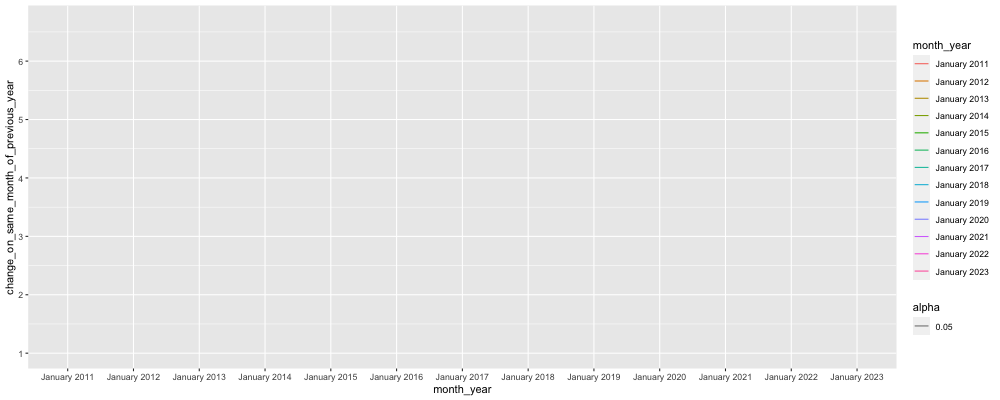

In [33]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

df_overall_jan_education_r <- read_csv("df_overall_jan_education.csv", show_col_types = FALSE) 


ggplot(df_overall_jan_education_r) +
    aes(x=month_year, y=change_on_same_month_of_previous_year, color=month_year, alpha=.05) +
    geom_line() 
#     geom_vline(aes(xintercept=0), color='grey') +facet_wrap(~year, ncol=2)

In [34]:
df_overall_jan_maize=df_overall_jan_food.query("commodity_name.isin(['Maize Flour - Sifted', 'Maize Grain - Loose','Fortified Maize flour','Loose Maize Grain'])")
df_overall_jan_maize

,commodity_name,quantity_plus_unit,avg_price_this_month_last_year,avg_price_last_month,avg_price_this_month_this_year,pct_change_over_last_month_this_month_vs_last_month,pct_change_over_last_year_this_month_this_year_vs_this_month_last_year,month_year,quantity,unit
4,Maize Grain - Loose,1 Kilogramme,56.73,77.47,76.42,-1.4,$34.70,January 2023,1,Kilogramme
19,Maize Flour - Sifted,2 Kg,117.36,118.71,126.31,6.41,$7.63,January 2022,2,Kg
40,Fortified Maize flour,2 Kg,131.71,116.8,119.49,2.3,$-9.28,January 2021,2,Kg
50,Maize Grain - Loose,1 Kg,35.23,51.42,51.53,0.21,$46.25,January 2020,1,Kg
52,Maize Flour - Sifted,2 Kg,87.2,131.77,131.9,0.1,$51.27,January 2020,2,Kg
70,Maize Grain - Loose,1 Kg,59.3,35.05,35.23,0.53,$-40.58,January 2019,1,Kg
78,Maize Flour - Sifted,2 Kg,122.88,86.55,87.2,0.75,$-29.04,January 2019,2,Kg
105,Maize Flour - Sifted,2 Kg,106.15,115.18,119.64,3.9,$12.70,January 2017,2,Kg
112,Loose Maize Grain,1 Kg,41.08,45.78,46.41,1.4,$13.00,January 2017,1,Kg
140,Maize Flour - Sifted,2 Kg,112.21,103.93,100.93,-2.9,$-10.10,January 2015,2,Kg


In [35]:
df_overall_jan_potatoes=df_overall_jan_food.query("commodity_name.isin(['Potatoes','Potatoes (Irish)','Irish Potatoes'])")
df_overall_jan_potatoes

,commodity_name,quantity_plus_unit,avg_price_this_month_last_year,avg_price_last_month,avg_price_this_month_this_year,pct_change_over_last_month_this_month_vs_last_month,pct_change_over_last_year_this_month_this_year_vs_this_month_last_year,month_year,quantity,unit
1,Potatoes (Irish),1 Kilogramme,76.16,94.57,91.02,-3.8,$19.50,January 2023,1,Kilogramme
28,Potatoes (Irish),1 Kg,68.44,73.32,76.16,3.87,$11.29,January 2022,1,Kg
39,Potatoes (Irish),1 Kg,68.08,67.01,68.44,2.12,$0.53,January 2021,1,Kg
59,Potatoes (Irish),1 Kg,75.42,72.58,72.46,-0.17,$-3.93,January 2020,1,Kg
92,Potatoes (Irish),1 Kg,82.33,54.4,56.1,3.13,$-31.85,January 2018,1,Kg
113,Irish Potatoes,1 Kg,74.37,81.43,82.33,1.1,$10.70,January 2017,1,Kg
123,Potatoes (Irish),1 Kg,46.32,76.4,74.37,-2.66,$60.57,January 2016,1,Kg
139,Potatoes (Irish),1 Kg,52.05,46.39,46.32,-0.2,$-11.00,January 2015,1,Kg
152,Potatoes (Irish),1 Kg,55.47,51.21,52.05,1.63,$-6.17,January 2014,1,Kg


In [36]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

df_cost_of_education_r <- read_csv("/Users/ivynyayieka/Downloads/food_basket/cost_of_education_trend.csv", show_col_types = FALSE) 




In [37]:
!install.packages("ggpubr")


zsh:1: missing delimiter for 'g' glob qualifier


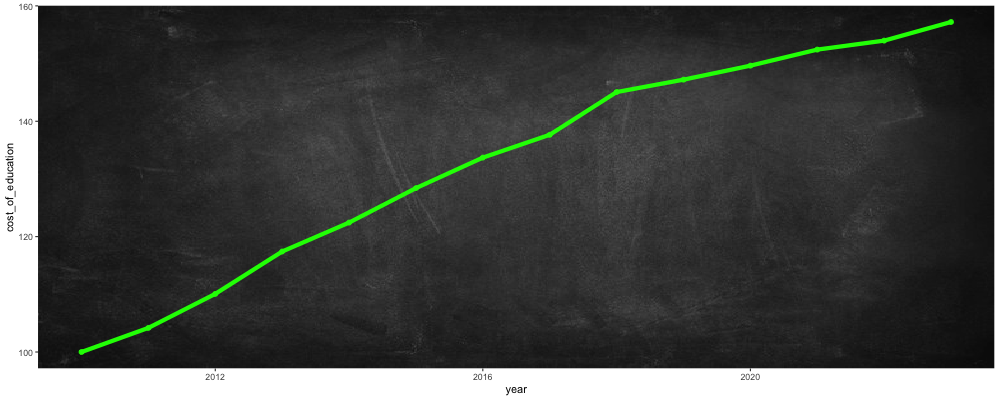

In [38]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below
library(jpeg)
# library(ggpubr)

img <- readJPEG("/Users/ivynyayieka/Downloads/food_basket/blackboard.jpeg")

background_image <- function(raster.img){
  annotation_raster(raster.img,
                    xmin = -Inf, xmax = Inf,
                    ymin = -Inf, ymax = Inf)
}


    
ggplot(data=df_cost_of_education_r, aes(x=year, y=cost_of_education, group=1)) +
    background_image(img) +
    geom_line(color="green", size=2) +
    geom_point(color="green",size=2)



In [39]:
%%R

arrows2 <- 
  tibble(
    x1 = c(2017),
    x2 = c(2017.25),
    y1 = c(145), 
    y2 = c(142)
  )

arrows2

# A tibble: 1 × 4
     x1    x2    y1    y2
  <dbl> <dbl> <dbl> <dbl>
1  2017 2017.   145   142


In [43]:
%%R

arrows3 <- 
  tibble(
    x1 = c(2015.4),
    x2 = c(2015.75),
    y1 = c(142), 
    y2 = c(135)
  )



arrows4 <- 
  tibble(
    x1 = c(2015.4),
    x2 = c(2016.25),
    y1 = c(142), 
    y2 = c(136)
  )


In [44]:
%%R

arrows1 <- 
  tibble(
    x1 = c(2016),
    x2 = c(2017.125),
    y1 = c(145), 
    y2 = c(139.5)
  )

arrows1

# A tibble: 1 × 4
     x1    x2    y1    y2
  <dbl> <dbl> <dbl> <dbl>
1  2016 2017.   145  140.


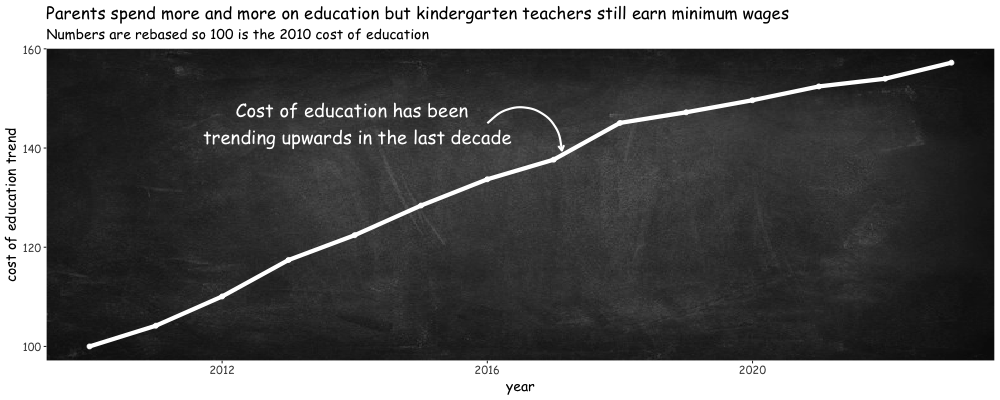

In [45]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below
library(jpeg)
# library(ggpubr)
img <- readJPEG("/Users/ivynyayieka/Downloads/food_basket/blackboard.jpeg")

background_image <- function(raster.img){
  annotation_raster(raster.img,
                    xmin = -Inf, xmax = Inf,
                    ymin = -Inf, ymax = Inf)
}


    
ggplot(data=df_cost_of_education_r, aes(x=year, y=cost_of_education, group=1)) +
    background_image(img) +
    geom_line(color="white", size=2) +
    annotate("text", x=2014, y=145, label="Cost of education has been \n trending upwards in the last decade", angle=360, size=6.5, color="white", family="Comic Sans MS") +
    geom_point(color="white",size=2)+
    geom_curve(
        data = arrows1, aes(x = x1, y = y1, xend = x2, yend = y2),
        arrow = arrow(length = unit(0.08, "inch")), size = 1,
        color = "white", curvature = -0.75)+
    labs(
        title='Parents spend more and more on education but kindergarten teachers still earn minimum wages',
        subtitle="Numbers are rebased so 100 is the 2010 cost of education",
        )+
    theme(text=element_text(size=14,  family="Comic Sans MS")) +
    ylab("cost of education trend") +
    xlab("year") 



In [165]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below
library(jpeg)
# library(ggpubr)
img <- readJPEG("/Users/ivynyayieka/Downloads/food_basket/blackboard.jpeg")

background_image <- function(raster.img){
  annotation_raster(raster.img,
                    xmin = -Inf, xmax = Inf,
                    ymin = -Inf, ymax = Inf)
}


    
ggplot(data=df_cost_of_education_r, aes(x=year, y=cost_of_education, group=1)) +
    background_image(img) +
    geom_line(color="white", size=2) +
    annotate("text", x=2014, y=145, label="Cost of education has been \n trending upwards in the last decade", angle=360, size=6.5, color="white", family="Comic Sans MS") +
    geom_point(color="white",size=2)+
    geom_curve(
        data = arrows1, aes(x = x1, y = y1, xend = x2, yend = y2),
        arrow = arrow(length = unit(0.08, "inch")), size = 1,
        color = "white", curvature = -0.75)+
    labs(
        title='Parents spend more and more on education but kindergarten teachers still earn minimum wages',
        subtitle="Numbers are rebased so 100 is the 2010 cost of education",
        )+
    theme(text=element_text(size=14,  family="Comic Sans MS")) +
    ylab("cost of education trend") +
    xlab("year") 

ggsave("education_cost.png")



Saving 13.9 x 5.56 in image


In [46]:
# %%R -w 1000 -h 400

# # 👉 Chart 2
# # Insert code for a ggplot chart below
# library(jpeg)
# # library(ggpubr)
# library(showtext)
# font_add_google("Mynerve", family = "Mynerve")

# img <- readJPEG("/Users/ivynyayieka/Downloads/food_basket/blackboard.jpeg")

# background_image <- function(raster.img){
#   annotation_raster(raster.img,
#                     xmin = -Inf, xmax = Inf,
#                     ymin = -Inf, ymax = Inf)
# }


    
# ggplot(data=df_cost_of_education_r, aes(x=year, y=cost_of_education, group=1)) +
#     background_image(img) +
#     geom_line(color="white", size=2) +
#     annotate("text", x=2014, y=145, label="Cost of education has been \n trending upwards in the last decade", angle=360, size=6.5, color="white", family="Mynerve") +
#     geom_point(color="white",size=2)+
#     geom_curve(
#         data = arrows1, aes(x = x1, y = y1, xend = x2, yend = y2),
#         arrow = arrow(length = unit(0.08, "inch")), size = 1,
#         color = "white", curvature = -0.75)+
#     labs(
#         title='Parents spend more and more on education but kindergarten teachers still earn minimum wages',
#         subtitle="Numbers are rebased so 100 is the 2010 cost of education",
#         )+
#     theme(text=element_text(size=14,  family="Mynerve")) +
#     ylab("cost of education trend") +
#     xlab("year") 



In [47]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

df_fees_r <- read_csv("/Users/ivynyayieka/Downloads/food_basket/fees.csv", show_col_types = FALSE) 




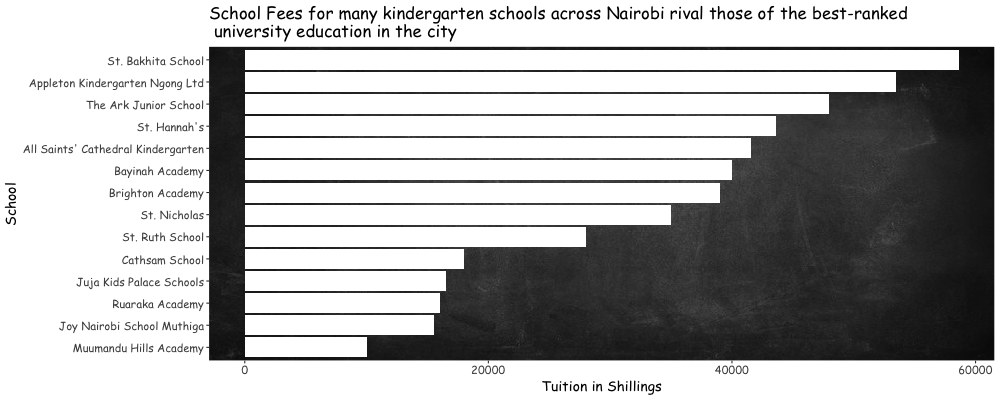

In [160]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below
library(jpeg)
# library(ggpubr)

img <- readJPEG("/Users/ivynyayieka/Downloads/food_basket/blackboard.jpeg")

background_image <- function(raster.img){
  annotation_raster(raster.img,
                    xmin = -Inf, xmax = Inf,
                    ymin = -Inf, ymax = Inf)
}

# df_fees_r_sorted <- arrange(df_fees_r, tuition_in_shillings) 

# Basic barplot
ggplot(data=df_fees_r, aes(x = reorder(School, tuition_in_shillings), y=tuition_in_shillings)) +
    background_image(img) +
    geom_bar(stat="identity", fill='white')+ 
    geom_vline(linetype = "dashed", aes(xintercept=16000), color='white', size=2.5)+
    labs(
        title='School Fees for many kindergarten schools across Nairobi rival those of the best-ranked \n university education in the city',
#         subtitle="The cost of the best ranked university in Nairobi is lower than the cost of many kindergartens around the city",
        )+
    theme(text=element_text(size=14,  family="Comic Sans MS"))+
    xlab("School") +
    ylab("Tuition in Shillings") + 
    coord_flip()    



In [161]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below
library(jpeg)
# library(ggpubr)

img <- readJPEG("/Users/ivynyayieka/Downloads/food_basket/blackboard.jpeg")

background_image <- function(raster.img){
  annotation_raster(raster.img,
                    xmin = -Inf, xmax = Inf,
                    ymin = -Inf, ymax = Inf)
}

# df_fees_r_sorted <- arrange(df_fees_r, tuition_in_shillings) 

# Basic barplot
ggplot(data=df_fees_r, aes(x = reorder(School, tuition_in_shillings), y=tuition_in_shillings)) +
    background_image(img) +
    geom_bar(stat="identity", fill='white')+ 
    geom_vline(linetype = "dashed", aes(xintercept=16000), color='white', size=2.5)+
    labs(
        title='School Fees for many kindergarten schools across Nairobi rival those of the best-ranked \n university education in the city',
#         subtitle="The cost of the best ranked university in Nairobi is lower than the cost of many kindergartens around the city",
        )+
    theme(text=element_text(size=14,  family="Comic Sans MS"))+
    xlab("School") +
    ylab("Tuition in Shillings") + 
    coord_flip()    



ggsave("nairobischools.png")


Saving 13.9 x 5.56 in image


In [103]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

df_wage_expenditure_r <- read_csv("/Users/ivynyayieka/Downloads/food_basket/wage_expenditure.csv", show_col_types = FALSE) 




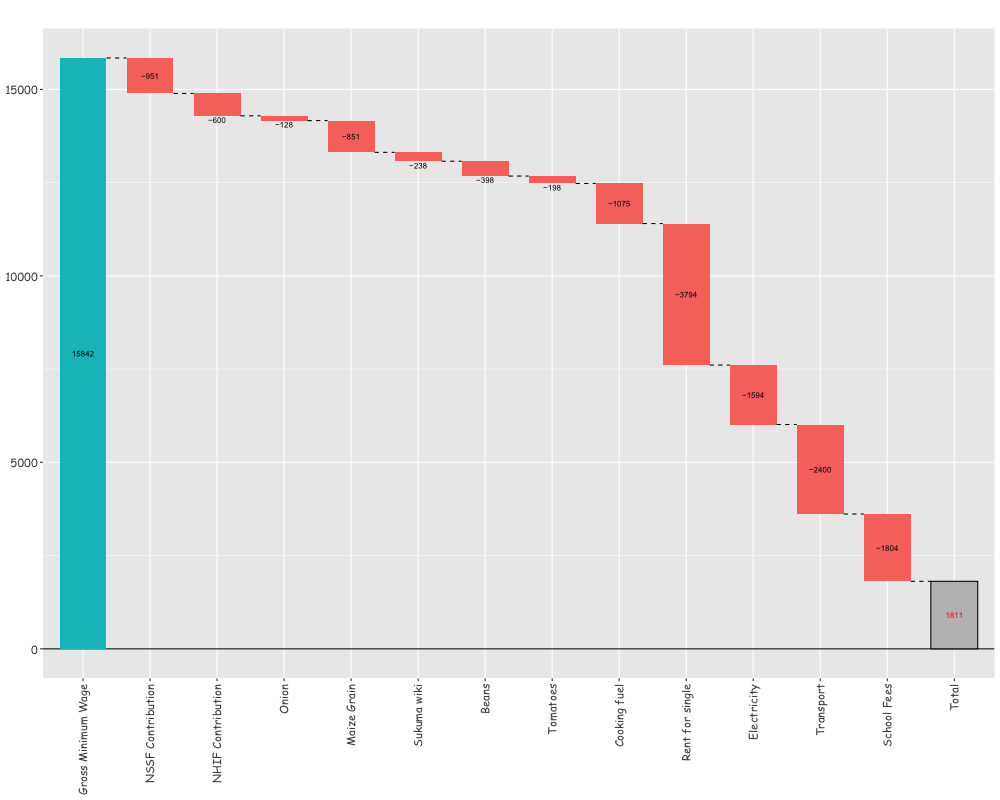

In [162]:
%%R -w 1000 -h 800

# 👉 Chart 2
# Insert code for a ggplot chart below
library(jpeg)
library(waterfalls)




img <- readJPEG("/Users/ivynyayieka/Downloads/food_basket/blackboard.jpeg")

background_image <- function(raster.img){
  annotation_raster(raster.img,
                    xmin = -Inf, xmax = Inf,
                    ymin = -Inf, ymax = Inf)
}




waterfall(df_wage_expenditure_r, 
          calc_total = TRUE, 
          total_rect_text_color = "red", 
          rect_border = NA,
          total_rect_color = "grey")+
    theme(text=element_text(size=14,  family="Comic Sans MS", color="white"))+
    xlab("Wages and Expenditure") +
    ylab("Shillings")+
    labs(
        title='Teachers earn a minimum wage despite the high cost of living in Nairobi city even by ',
#         subtitle="The cost of the best ranked university in Nairobi is lower than the cost of many kindergartens around the city",
        ) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    scale_fill_brewer(palette = "Dark2") 

In [163]:
%%R -w 1000 -h 800

# 👉 Chart 2
# Insert code for a ggplot chart below
library(jpeg)
library(waterfalls)




img <- readJPEG("/Users/ivynyayieka/Downloads/food_basket/blackboard.jpeg")

background_image <- function(raster.img){
  annotation_raster(raster.img,
                    xmin = -Inf, xmax = Inf,
                    ymin = -Inf, ymax = Inf)
}




waterfall(df_wage_expenditure_r, 
          calc_total = TRUE, 
          total_rect_text_color = "red", 
          rect_border = NA,
          total_rect_color = "grey")+
    theme(text=element_text(size=14,  family="Comic Sans MS", color="white"))+
    xlab("Wages and Expenditure") +
    ylab("Shillings")+
    labs(
        title='Teachers earn a minimum wage despite the high cost of living in Nairobi city even by ',
#         subtitle="The cost of the best ranked university in Nairobi is lower than the cost of many kindergartens around the city",
        ) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    scale_fill_brewer(palette = "Dark2") 

ggsave("wage_expenditure.png")


Saving 13.9 x 11.1 in image


In [121]:
# %%R
# ggplot(df_wage_expenditure_r, aes(category, fill = sign))+
#     geom_rect(aes(x = category, xmin = id - 0.475, xmax = id + 0.475, ymin = end, ymax = start)) +
#     scale_y_continuous(labels = percent) +
#     scale_x_discrete("", breaks = levels(df_wage_expenditure_r$category), labels = gsub(" ", "\n", levels(df_wage_expenditure_r$category)))

In [133]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below

df_wage_commodity_cost_r <- read_csv("/Users/ivynyayieka/Downloads/food_basket/wage_commodity_cost.csv", show_col_types = FALSE) 




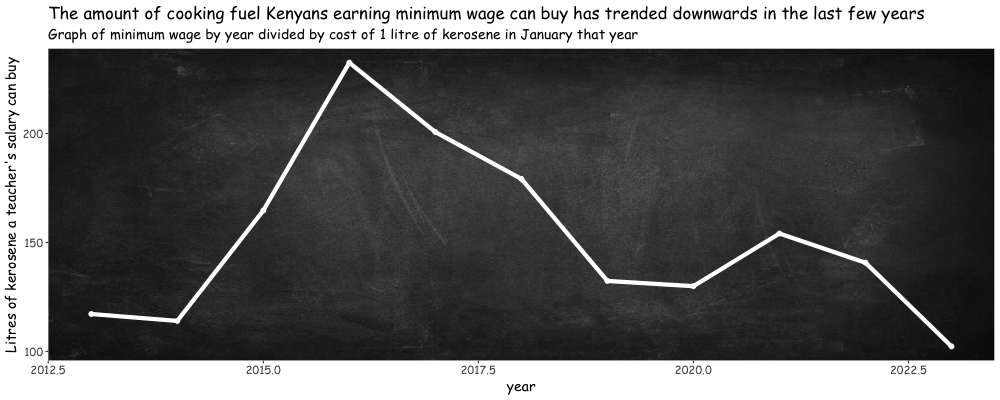

In [146]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below
library(jpeg)
# library(ggpubr)
img <- readJPEG("/Users/ivynyayieka/Downloads/food_basket/blackboard.jpeg")

background_image <- function(raster.img){
  annotation_raster(raster.img,
                    xmin = -Inf, xmax = Inf,
                    ymin = -Inf, ymax = Inf)
}


    
ggplot(data=df_wage_commodity_cost_r, aes(x=year, y=wage_over_fuel, group=1)) +
    background_image(img) +
    geom_line(color="white", size=2) +
#     annotate("text", x=2014, y=145, label="Cost of education has been \n trending upwards in the last decade", angle=360, size=6.5, color="white", family="Comic Sans MS") +
    geom_point(color="white",size=2)+
#     geom_curve(
#         data = arrows1, aes(x = x1, y = y1, xend = x2, yend = y2),
#         arrow = arrow(length = unit(0.08, "inch")), size = 1,
#         color = "white", curvature = -0.75)+
    labs(
        title='The amount of cooking fuel Kenyans earning minimum wage can buy has trended downwards in the last few years',
        subtitle="Graph of minimum wage by year divided by cost of 1 litre of kerosene in January that year",
        )+
    theme(text=element_text(size=14,  family="Comic Sans MS")) +
    ylab("Litres of kerosene a teacher's salary can buy") +
    xlab("year") 



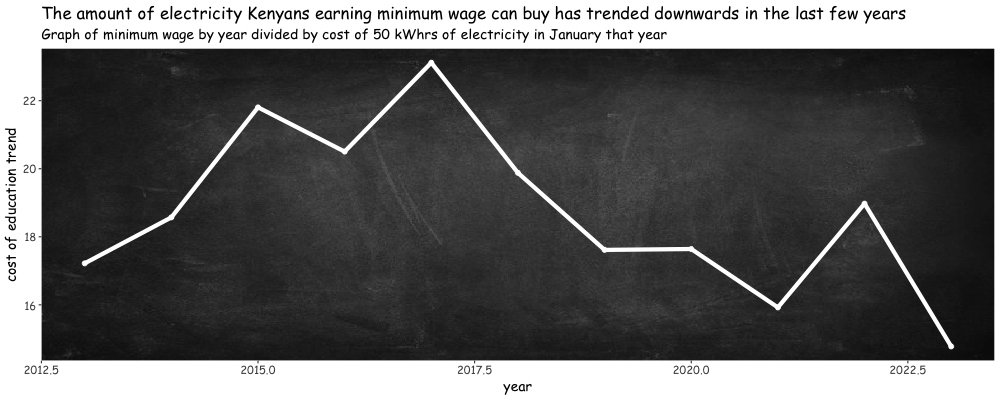

In [145]:
%%R -w 1000 -h 400

# 👉 Chart 2
# Insert code for a ggplot chart below
library(jpeg)
# library(ggpubr)
img <- readJPEG("/Users/ivynyayieka/Downloads/food_basket/blackboard.jpeg")

background_image <- function(raster.img){
  annotation_raster(raster.img,
                    xmin = -Inf, xmax = Inf,
                    ymin = -Inf, ymax = Inf)
}


    
ggplot(data=df_wage_commodity_cost_r, aes(x=year, y=wage_over_elec, group=1)) +
    background_image(img) +
    geom_line(color="white", size=2) +
#     annotate("text", x=2014, y=145, label="Cost of education has been \n trending upwards in the last decade", angle=360, size=6.5, color="white", family="Comic Sans MS") +
    geom_point(color="white",size=2)+
#     geom_curve(
#         data = arrows1, aes(x = x1, y = y1, xend = x2, yend = y2),
#         arrow = arrow(length = unit(0.08, "inch")), size = 1,
#         color = "white", curvature = -0.75)+
    labs(
        title='The amount of electricity Kenyans earning minimum wage can buy has trended downwards in the last few years',
        subtitle="Graph of minimum wage by year divided by cost of 50 kWhrs of electricity in January that year",
        )+
    theme(text=element_text(size=14,  family="Comic Sans MS")) +
    ylab("cost of education trend") +
    xlab("year") 



In [164]:
# %%R -w 1000 -h 800

# # 👉 Chart 2
# # Insert code for a ggplot chart below
# library(jpeg)
# library(waterfalls)




# img <- readJPEG("/Users/ivynyayieka/Downloads/food_basket/blackboard.jpeg")

# background_image <- function(raster.img){
#   annotation_raster(raster.img,
#                     xmin = -Inf, xmax = Inf,
#                     ymin = -Inf, ymax = Inf)
# }


# ggplot(data=df_wage_expenditure_r, aes(x=commodity_name, y=monthly_cost)) +
# #     background_image(img) +
#     geom_bar(stat="identity", fill='white')
# #     geom_vline(linetype = "dashed", aes(xintercept=16000), color='white', size=2.5)+
# #     labs(
# #         title='School Fees for many kindergarten schools across Nairobi rival those of the best-ranked \n university education in the city',
# # #         subtitle="The cost of the best ranked university in Nairobi is lower than the cost of many kindergartens around the city",
# #         )+
# #     theme(text=element_text(size=14,  family="Comic Sans MS"))+
# #     xlab("School") +
# #     ylab("Tuition in Shillings")



# # waterfall(df_wage_expenditure_r, 
# #           calc_total = TRUE, 
# #           total_rect_text_color = "red", 
# #           rect_border = NA,
# #           total_rect_color = "grey")+
# #     theme(text=element_text(size=14,  family="Comic Sans MS", color="white"))+
# #     xlab("Wages and Expenditure") +
# #     ylab("Shillings")+
# #     labs(
# #         title='Teachers earn a minimum wage despite the high cost of living in Nairobi city even by ',
# # #         subtitle="The cost of the best ranked university in Nairobi is lower than the cost of many kindergartens around the city",
# #         ) +
# #     theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
# #     scale_fill_brewer(palette = "Dark2") 